# Week 8 Seminar Answers

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 47.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [3]:
data = yf.download('SPY', start='2021-04-18', end='2022-04-18')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-19,416.260010,416.739990,413.790009,415.209991,409.817017,78498500
2021-04-20,413.910004,415.089996,410.589996,412.170013,406.816467,81851800
2021-04-21,411.510010,416.290009,411.359985,416.070007,410.665833,66793000
2021-04-22,415.890015,416.779999,411.130005,412.269989,406.915192,97582800
2021-04-23,412.869995,418.250000,412.790009,416.739990,411.327148,73209200


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,452.059998,455.910004,450.059998,455.910004,455.910004,68529800
2022-03-29,460.019989,462.070007,457.179993,461.549988,461.549988,86581500
2022-03-30,460.339996,461.200012,456.470001,458.700012,458.700012,79666900
2022-03-31,457.890015,458.760010,451.160004,451.640015,451.640015,121699900
2022-04-01,453.309998,453.459991,449.140015,452.920013,452.920013,89001500


In [6]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 452.92


In [7]:
Ethereum_prices = pd.DataFrame(data["Close"]).rename(columns={"Closing Price (USD)": "Price"})
Ethereum_prices.head()

,Close
Date,
2021-04-19,415.209991
2021-04-20,412.170013
2021-04-21,416.070007
2021-04-22,412.269989
2021-04-23,416.739990


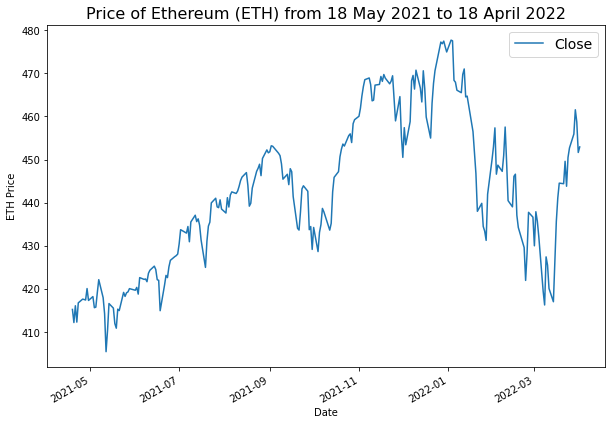

In [8]:
import matplotlib.pyplot as plt
Ethereum_prices.plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of Ethereum (ETH) from 18 May 2021 to 18 April 2022", fontsize=16)
plt.legend(fontsize=14);

In [9]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [10]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

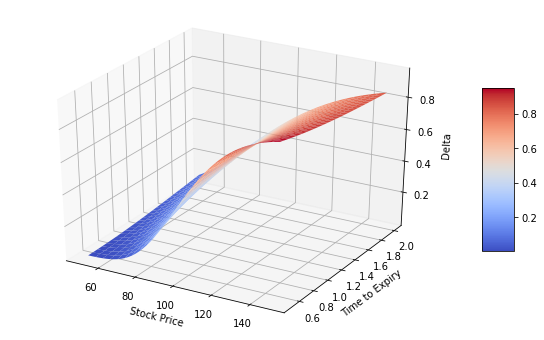

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [12]:
d = delta(100, 105, 1, 0.04, 0.02, 0.3, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5112 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5112 .


In [13]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [14]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

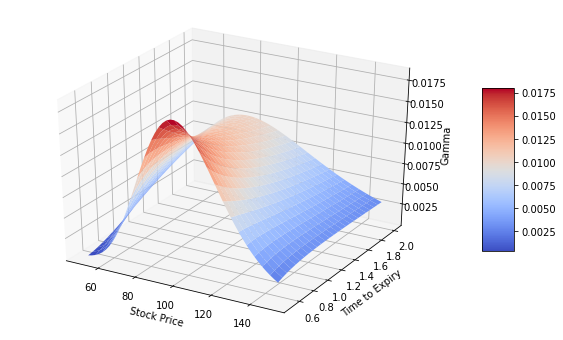

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [16]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [17]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

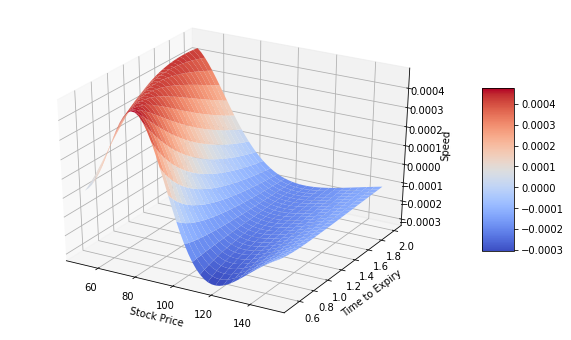

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [19]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [20]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

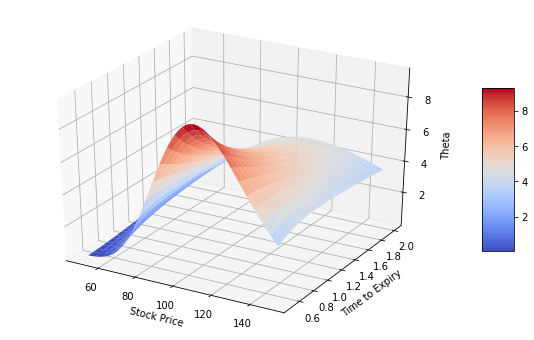

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [22]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [23]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 105, T[i], 0.04, 0.02, 0.3, 'call')

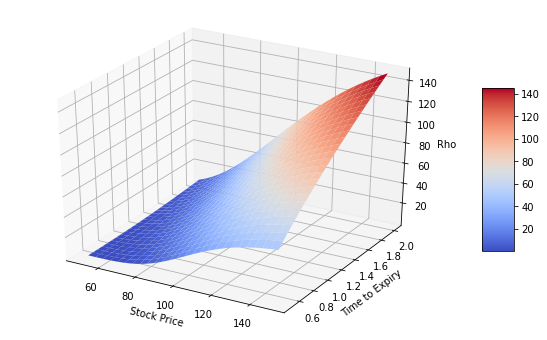

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [25]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [26]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [27]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'put')

8.627674029559998

In [28]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Put [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

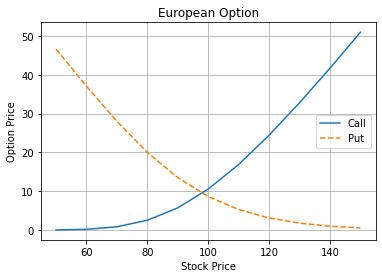

In [29]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [32]:
S0 = 100.0              # spot stock price
K = 100.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sig = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [33]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u   

In [34]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [35]:
S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [  0.        ,  89.09472523, 100.        , 112.24009024],
       [  0.        ,   0.        ,  79.37870064,  89.09472523],
       [  0.        ,   0.        ,   0.        ,  70.72223522]])

In [38]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [36]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [39]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 4.15461967,  1.49175992,  0.        ,  0.        ],
       [ 0.        ,  8.82373471,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 17.34290941, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [40]:
print('European ' + payoff, str( V[0,0]))

European put 4.154619665678642


In [41]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [42]:
T = 1
r = 0.1
sigma = 0.2
S0 = 100
K = 100

In [43]:
S = mcs_simulation_np(1000)

In [44]:
S = np.transpose(S)
S

array([[100.        , 100.2507958 , 100.2727702 , ..., 122.69704381,
        122.04210349, 122.31441672],
       [100.        , 100.22411688, 100.24637453, ..., 104.66711137,
        104.33478202, 103.83855706],
       [100.        , 101.04913523, 101.48662443, ...,  93.70085454,
         92.6773611 ,  92.99737418],
       ...,
       [100.        , 100.53499356, 101.3610325 , ..., 139.75481429,
        141.5041192 , 141.27504136],
       [100.        ,  99.23437261,  99.48711938, ..., 111.42067073,
        110.95032652, 111.19794987],
       [100.        , 100.19974995,  99.94086107, ...,  89.77298637,
         89.81325468,  89.86245768]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

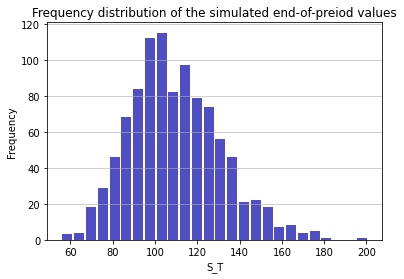

In [45]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [46]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 4.2197057921794965


Step 1: Find the log return of Index

In [ ]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

Step 2: Calculate its standard deviation and annualised  it 

In [ ]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 15.12 %


And the spot value for VIX is 

In [ ]:
VIX = yf.download("^VIX", start="2021-04-18", end="2022-04-18")

[*********************100%***********************]  1 of 1 completed


In [ ]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 20.56 %


In [ ]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [ ]:
K = 430
T = 1/12
r = 0.0132

In [ ]:
call = euro_option_bs(S, K, T, r, vol, 'call')
print('The BS call price is', round(call, 2))

The BS call price is 23.31


In [ ]:
put = euro_option_bs(S, K, T, r, vol, 'put')
print('The BS put price is', round(put, 2))

The BS put price is 1.19


In [ ]:
SP500 = yf.Ticker('SPY')

In [ ]:
opt = SP500.option_chain('2022-05-20')
call1 = opt.calls.lastPrice[opt.calls.strike == K]
print('The Market call price is', float(call1.values))

The Market call price is 29.2


In [ ]:
put1 = opt.puts.lastPrice[opt.puts.strike == K]
print('The Market put price is', float(put1.values))

The Market put price is 5.82


## Question 5

In [ ]:
call2 = euro_option_bs(S, K, T, r, vix*0.01, 'call')
print('The BS call price is', round(call2,2))

The BS call price is 25.01


In [ ]:
put2 = euro_option_bs(S, K, T, r, vix*0.01, 'put')
print('The BS put price is', round(put2,2))

The BS put price is 2.9


The results using the VIX is much better.

In [ ]:
K = np.linspace(375,465,4)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [ ]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

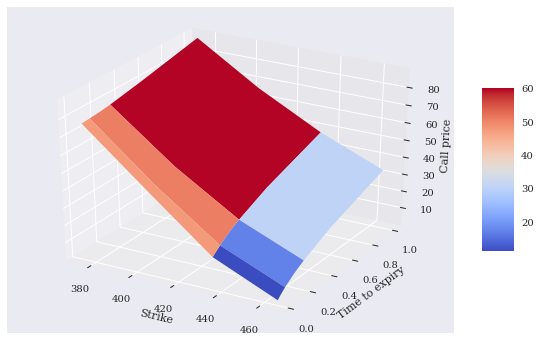

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);